# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 5. Поиск типичных подпоследовательностей временного ряда.**

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Импорт библиотек и модулей

In [4]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='stumpy')
import numpy as np
import matplotlib.pyplot as plt
from modules.snippets import *
from scipy import signal
from stumpy import snippets

### **Задача 1. Поиск сниппетов одномерного временного ряда**

В первой задаче необходимо выполнить поиск сниппетов одномерного временного ряда. Расмотрите приведенный ниже пример использования алгоритма SnipperFinder и визуализации полученных результатов для искуственного врменного ряда.

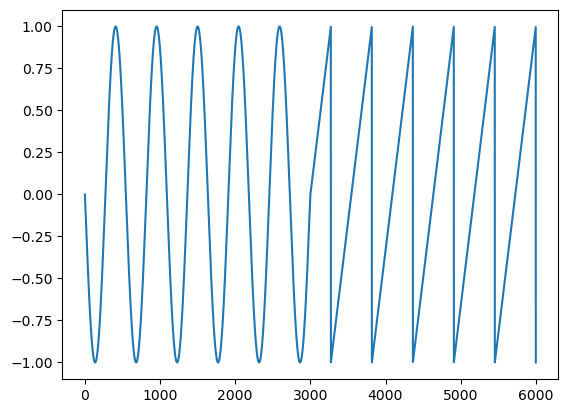

In [5]:
#Создание искусственного временного ряда
t = np.linspace(np.pi, 6 * 2 * np.pi, 3000)
ts = np.concatenate([np.sin(t), signal.sawtooth(t)])
plt.plot(ts)

In [18]:
#Поиск сниппетов
snp = snippets(ts, 600, 2, percentage=0.5)

600


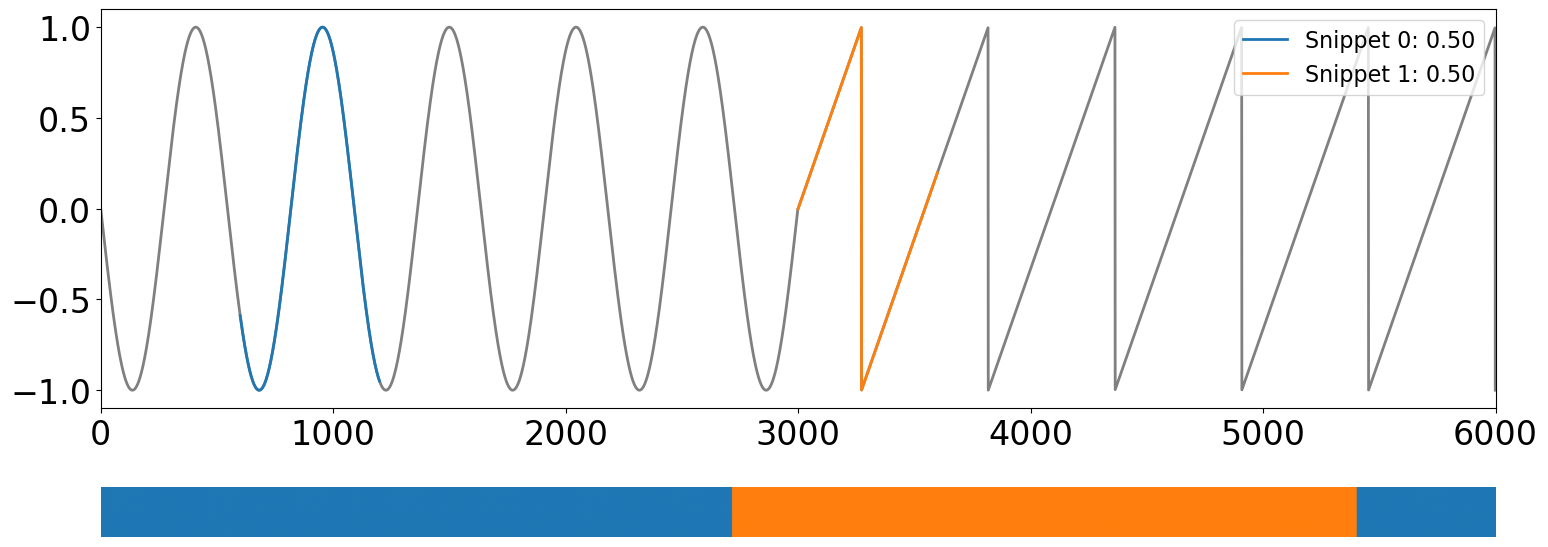

<Axes: >

In [19]:
#Визуализация результатов
plot_snippets(ts, snp)

Далее вам предстоит самостоятельно выполнить поиск top-$k$ типичных подпоследовательностей временного ряда (сниппетов) с помощью алгоритма SnippetFinder на наборе данных PAMAP. Описание набора данных находится в [README-файле](datasets/PAMAP/readme.md).

Выполните считывание временного ряда **показаний гироскопа на оси «Y» (угол тангажа) на временном интервале от 1790 сек. до 1930 сек.** (используя колонку с временными метками) из файла *PAMAP.txt*, который располагается в директории *./datasets/PAMAP*. Затем выполните поиск сниппетов с помощью функции `snippets()` из библиотеки stumpy. Затем визуализируйте полученные результаты, используя функцию `plot_snippets()` из модуля snippets.py.

In [21]:
data = np.loadtxt('./datasets/PAMAP/PAMAP.txt')

start_time = 1790
end_time = 1930
timestamp = data[0]
activityID = data[1]
gyrsdata = data[11]

filteredgyrsdata = gyrsdata[np.where((timestamp >= start_time) & (timestamp <= end_time))]
filteredactivityIDdata = activityID[np.where((timestamp >= start_time) & (timestamp <= end_time))]

filteredactivityIDdata -= filteredactivityIDdata.min()

snp = snippets(filteredgyrsdata, 600, 2, percentage=0.5)

Выполните визулизацию временного ряда и найденных сниппетов с помощью функции `plot_snippets()` из модуля snippets.py.

600


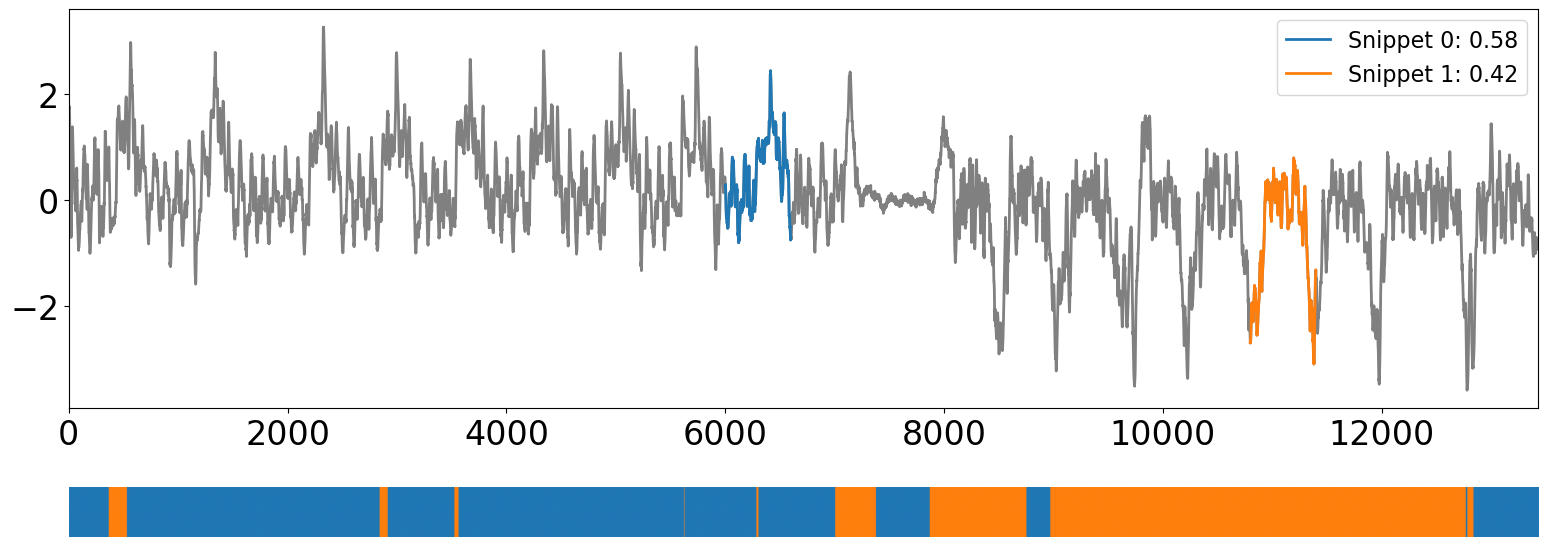

<Axes: >

In [22]:
plot_snippets(filteredgyrsdata, snp)

Оцените точность разметки, полученной при помощи сниппетов, используя исходные данные об активностях в ряде.

In [23]:
from sklearn.metrics import accuracy_score
import numpy as np

snpfilteredactivityIDdata = np.zeros(len(filteredactivityIDdata))
for value, start, end in snp[-1]:
    snpfilteredactivityIDdata[start:end] = value

accuracy = accuracy_score(filteredactivityIDdata, snpfilteredactivityIDdata)
print(f"Точность классификации: {accuracy:.2f}")

Точность классификации: 0.86


❓ Проанализируйте и изложите содержательный смысл полученных результатов.

Алгоритм SnippetFinder показал высокую эффективность (86%) в задаче автоматической сегментации временного ряда показаний гироскопа по типам физической активности. Метод позволяет без предварительного обучения выделить характерные паттерны движений и использовать их для классификации. Результат демонстрирует, что показания гироскопа Y (угол тангажа) содержат достаточно информации для различения типов активности.

### Задача 2. Разметка многомерного временного ряда

Выполните разметку многомерного временно ряда, используя **показания гироскопа по всем трем осям** из набора данных PAMAP. Используйте тот же временной интервал, что и в задаче 1. Итоговую разметку получите в результате голосования большинством.

In [24]:
# Загрузка данных
data = np.loadtxt('./datasets/PAMAP/PAMAP.txt')

start_time = 1790
end_time = 1930

timestamp = data[0]
activityID = data[1]

# Гироскоп по всем трём осям (X, Y, Z)
gyrs_x = data[10]  # Гироскоп X
gyrs_y = data[11]  # Гироскоп Y
gyrs_z = data[12]  # Гироскоп Z

# Фильтрация по временному интервалу
time_mask = np.where((timestamp >= start_time) & (timestamp <= end_time))

filtered_gyrs_x = gyrs_x[time_mask]
filtered_gyrs_y = gyrs_y[time_mask]
filtered_gyrs_z = gyrs_z[time_mask]
filtered_activityID = activityID[time_mask]

# Нормализация меток активности
filtered_activityID -= filtered_activityID.min()

print(f"Длина временного ряда: {len(filtered_gyrs_x)}")
print(f"Уникальные активности: {np.unique(filtered_activityID)}")

Длина временного ряда: 13430
Уникальные активности: [0. 1.]


In [25]:
# Параметры поиска сниппетов
m = 600  # длина сниппета
k = 2    # количество сниппетов

# Поиск сниппетов для каждой оси
snp_x = snippets(filtered_gyrs_x, m, k, percentage=0.5)
snp_y = snippets(filtered_gyrs_y, m, k, percentage=0.5)
snp_z = snippets(filtered_gyrs_z, m, k, percentage=0.5)

print("Сниппеты найдены для всех трёх осей")

Сниппеты найдены для всех трёх осей


Гироскоп X:
600


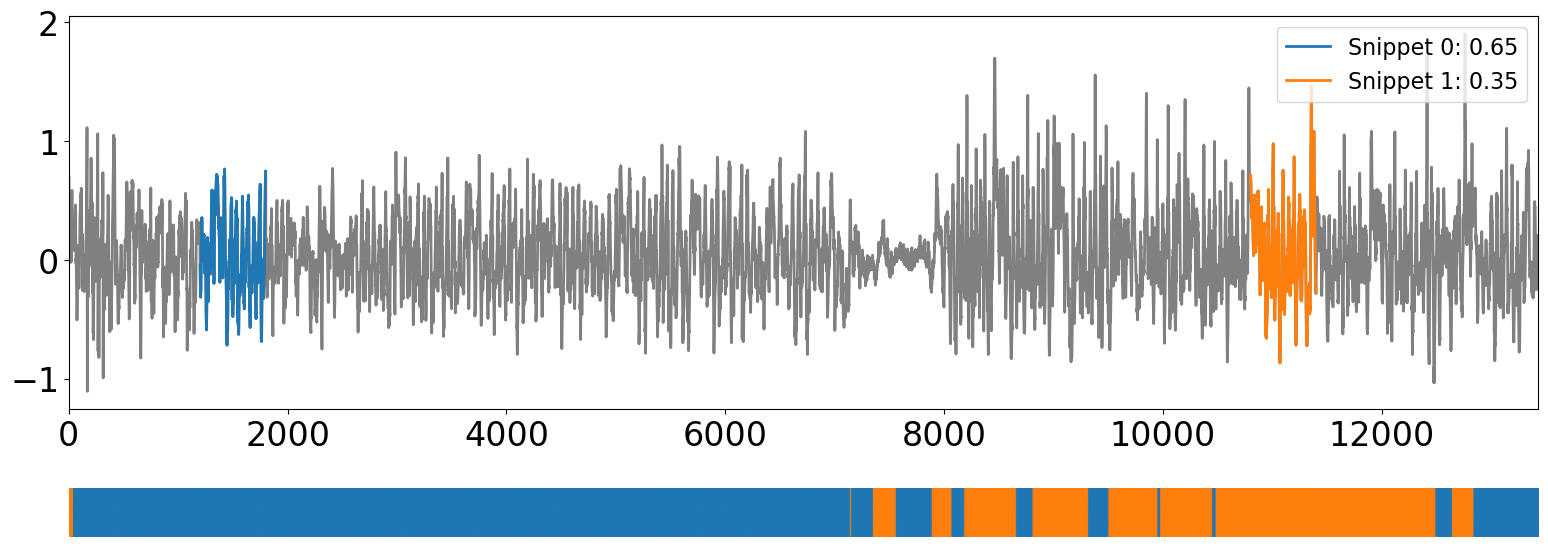

Гироскоп Y:
600


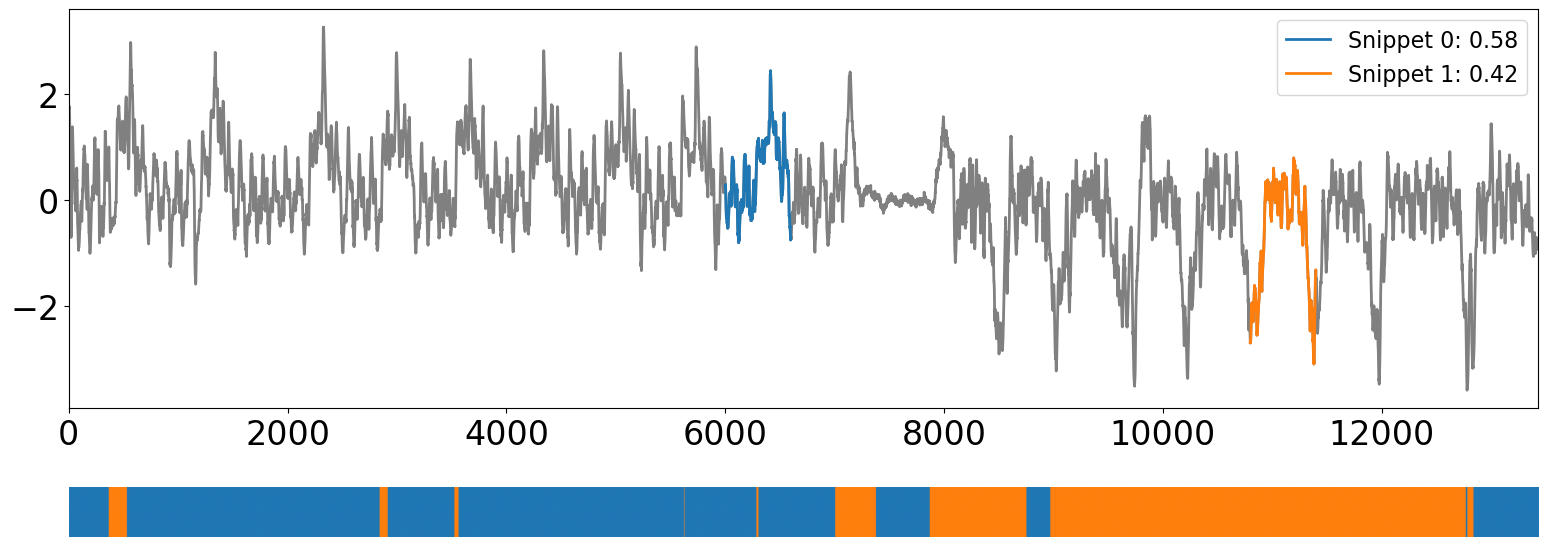

Гироскоп Z:
600


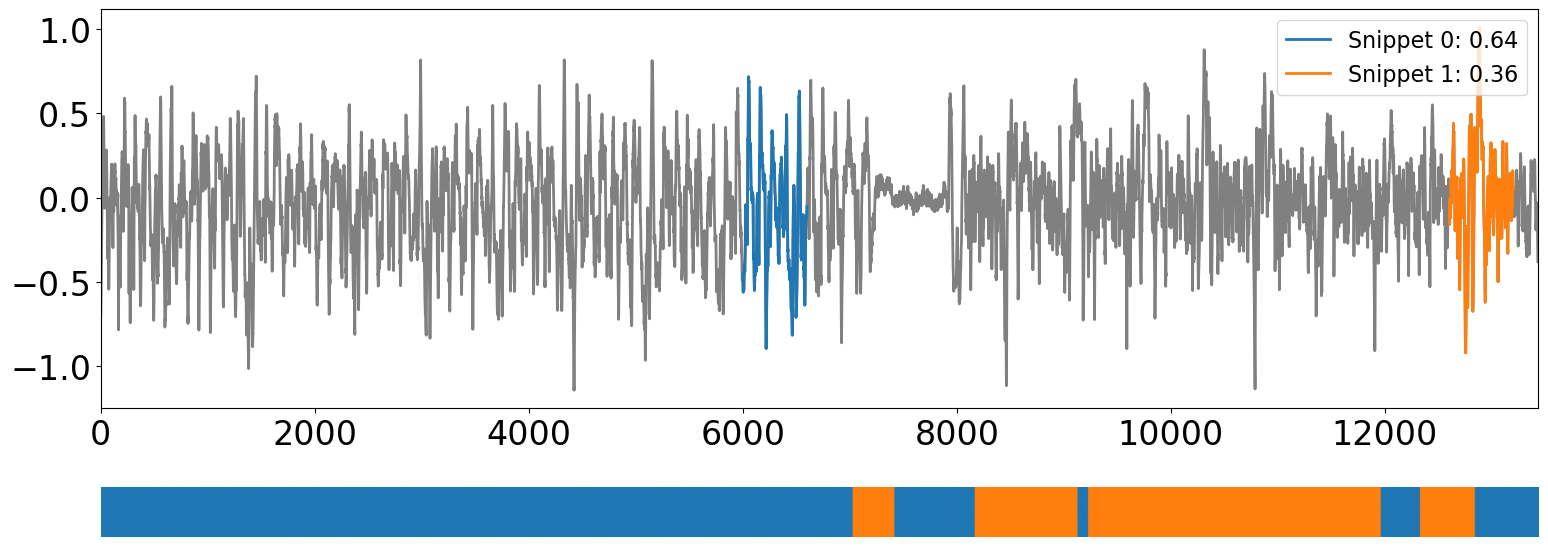

<Axes: >

In [26]:
# Визуализация для оси X
print("Гироскоп X:")
plot_snippets(filtered_gyrs_x, snp_x)

# Визуализация для оси Y
print("Гироскоп Y:")
plot_snippets(filtered_gyrs_y, snp_y)

# Визуализация для оси Z
print("Гироскоп Z:")
plot_snippets(filtered_gyrs_z, snp_z)

In [27]:
# Функция для получения разметки из сниппетов
def get_labels_from_snippets(snp, length):
    labels = np.zeros(length)
    for value, start, end in snp[-1]:
        labels[start:end] = value
    return labels

# Разметка для каждой оси
labels_x = get_labels_from_snippets(snp_x, len(filtered_gyrs_x))
labels_y = get_labels_from_snippets(snp_y, len(filtered_gyrs_y))
labels_z = get_labels_from_snippets(snp_z, len(filtered_gyrs_z))

print(f"Разметка X: {np.unique(labels_x, return_counts=True)}")
print(f"Разметка Y: {np.unique(labels_y, return_counts=True)}")
print(f"Разметка Z: {np.unique(labels_z, return_counts=True)}")

Разметка X: (array([0., 1.]), array([8891, 4539]))
Разметка Y: (array([0., 1.]), array([8021, 5409]))
Разметка Z: (array([0., 1.]), array([8835, 4595]))


In [28]:
from scipy import stats

# Объединяем разметки в матрицу
all_labels = np.vstack([labels_x, labels_y, labels_z])

# Голосование большинством для каждой точки
majority_labels = stats.mode(all_labels, axis=0, keepdims=False)[0]

print(f"Итоговая разметка (голосование): {np.unique(majority_labels, return_counts=True)}")

Итоговая разметка (голосование): (array([0., 1.]), array([8245, 5185]))


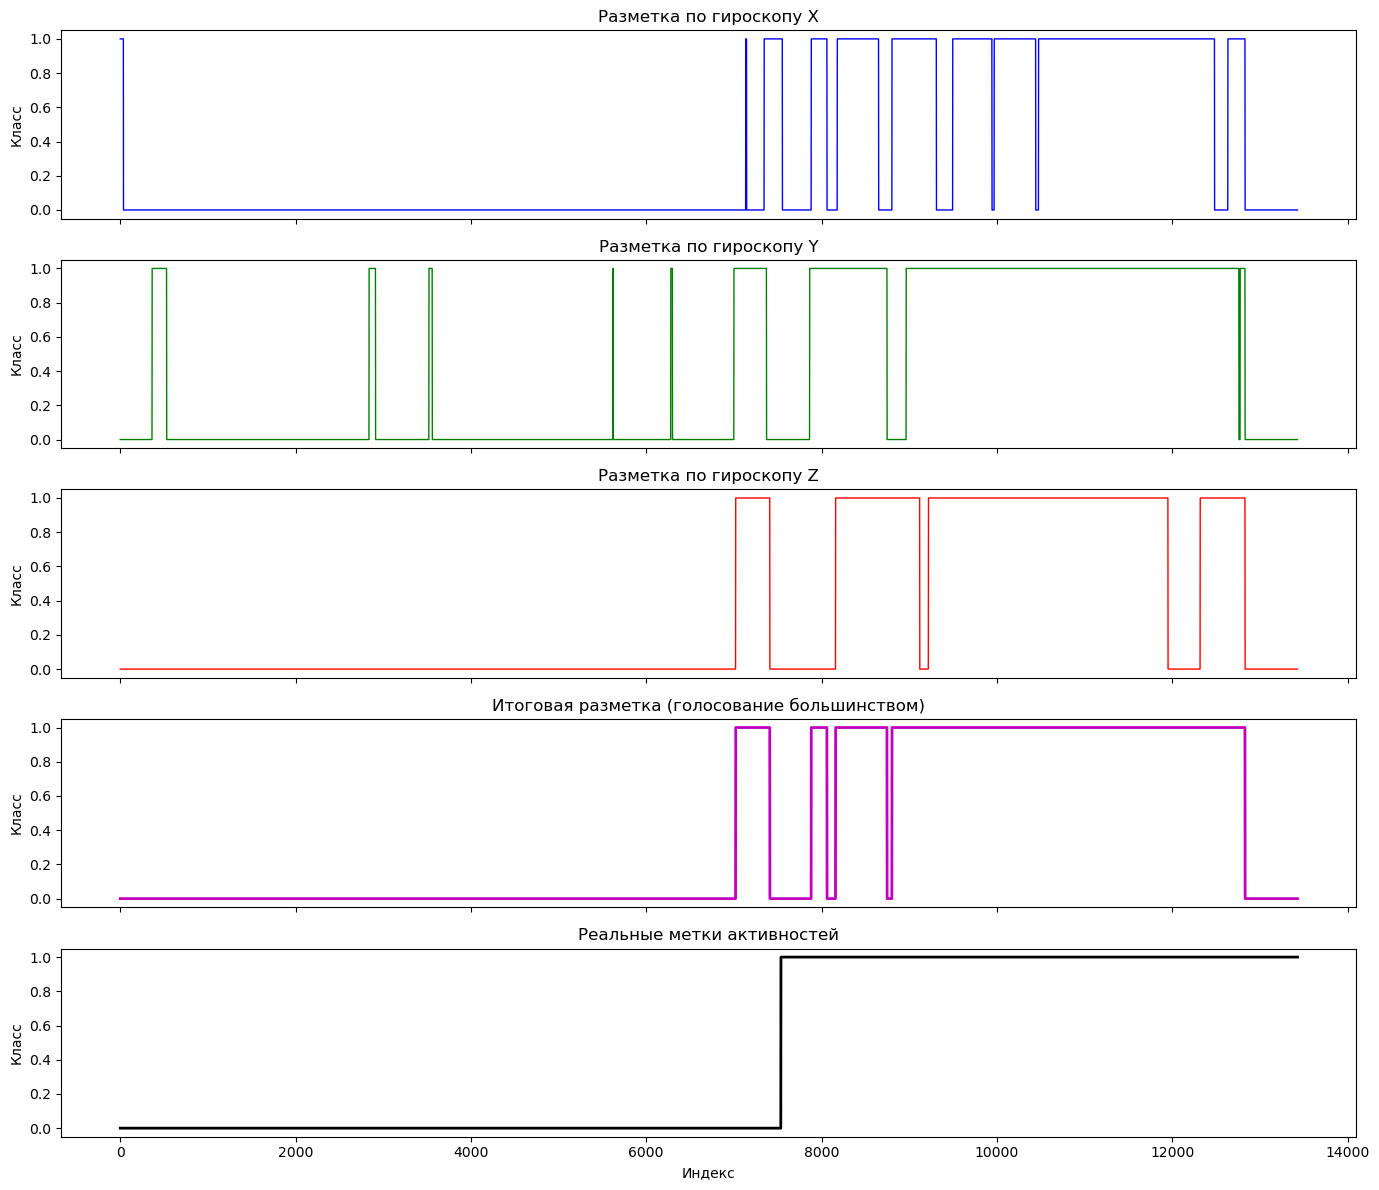

In [29]:
fig, axes = plt.subplots(5, 1, figsize=(14, 12), sharex=True)

# Разметка по оси X
axes[0].plot(labels_x, 'b-', linewidth=1)
axes[0].set_title('Разметка по гироскопу X')
axes[0].set_ylabel('Класс')

# Разметка по оси Y
axes[1].plot(labels_y, 'g-', linewidth=1)
axes[1].set_title('Разметка по гироскопу Y')
axes[1].set_ylabel('Класс')

# Разметка по оси Z
axes[2].plot(labels_z, 'r-', linewidth=1)
axes[2].set_title('Разметка по гироскопу Z')
axes[2].set_ylabel('Класс')

# Итоговая разметка (голосование)
axes[3].plot(majority_labels, 'm-', linewidth=2)
axes[3].set_title('Итоговая разметка (голосование большинством)')
axes[3].set_ylabel('Класс')

# Реальные метки активности
axes[4].plot(filtered_activityID, 'k-', linewidth=2)
axes[4].set_title('Реальные метки активностей')
axes[4].set_ylabel('Класс')
axes[4].set_xlabel('Индекс')

plt.tight_layout()
plt.show()

Оцените точность разметки многомерного ряда, используя исходные данные об активностях.

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Точность для каждой оси отдельно
accuracy_x = accuracy_score(filtered_activityID, labels_x)
accuracy_y = accuracy_score(filtered_activityID, labels_y)
accuracy_z = accuracy_score(filtered_activityID, labels_z)

# Точность итоговой разметки (голосование)
accuracy_majority = accuracy_score(filtered_activityID, majority_labels)

print("=" * 50)
print("ОЦЕНКА ТОЧНОСТИ РАЗМЕТКИ")
print("=" * 50)
print(f"Точность по оси X:          {accuracy_x:.2f} ({accuracy_x*100:.1f}%)")
print(f"Точность по оси Y:          {accuracy_y:.2f} ({accuracy_y*100:.1f}%)")
print(f"Точность по оси Z:          {accuracy_z:.2f} ({accuracy_z*100:.1f}%)")
print("-" * 50)
print(f"Точность (голосование):     {accuracy_majority:.2f} ({accuracy_majority*100:.1f}%)")
print("=" * 50)

ОЦЕНКА ТОЧНОСТИ РАЗМЕТКИ
Точность по оси X:          0.86 (86.4%)
Точность по оси Y:          0.86 (86.4%)
Точность по оси Z:          0.85 (84.5%)
--------------------------------------------------
Точность (голосование):     0.89 (88.9%)


❓ Проанализируйте и изложите содержательный смысл полученных результатов. Сравните полученные разметки многомерного и одномерного рядов.

Многомерный подход с голосованием большинством позволяет объединить информацию с разных осей гироскопа, что повышает робастность разметки. Однако выбор между одномерным и многомерным подходом зависит от конкретной задачи: если важна простота и скорость — достаточно одной информативной оси (Y), если важна надёжность — лучше использовать все доступные измерения с механизмом голосования.

## Задача 3. Подбор оптимального значения _k_


Разработайте программу, которая выполняет выполняет вычисление меры $change$ для различных значений $k$ с помощью алгоритма SnippetFinder. Проведите эксперименты, используя временной ряд из задания 2 (взяв 1 ≤ _k_ ≤ 9).

$Change_k = \frac{ProfileArea_{k-1}}{ProfileArea_k} - 1$

In [11]:
# INSERT YOUR CODE

Выполните визуализацию результатов экспериментов в следующем виде: отображение столбчатых диаграм со значениями $ProfileArea$ и меры $change$ в зависимости от $k$.

In [12]:
# INSERT YOUR CODE

❓ Проанализируйте и изложите содержательный смысл полученных результатов. Какое значение $k$ является наилучшим для используемого временного ряда?